In [5]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np
import pandas as pd
%matplotlib inline

In [6]:
X, y = make_blobs(n_samples=1000, centers=3, n_features =2 , random_state=27)

In [7]:
X

array([[ 5.33322041,  5.05954558],
       [-1.39688695,  9.913282  ],
       [-1.30513926,  7.92346073],
       ...,
       [ 4.67660658,  6.82235963],
       [-1.28078806,  4.69935754],
       [-1.73003495,  9.13073202]])

In [9]:
X.shape

(1000, 2)

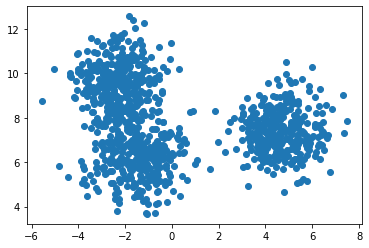

In [13]:
plt.scatter(X[:,0], X[:,1])

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y , test_size=0.33)

In [16]:
from sklearn.cluster import KMeans

MANNUAL PROCESS FOR FINDING VALUE OF K
USING ELBOW METHOD

In [22]:
wcss = []
import warnings

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init='k-means++') 
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
    

C:\Users\97798\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\97798\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\97798\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\97798\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

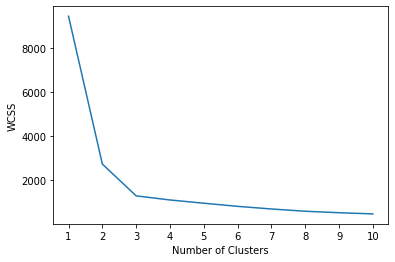

In [23]:
plt.plot(range(1,11), wcss)
plt.xticks(range(1,11))
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

k = 3

In [24]:
kmeans = KMeans(n_clusters=3, init='k-means++')

In [26]:
y_labels = kmeans.fit_predict(X_train)

C:\Users\97798\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\97798\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


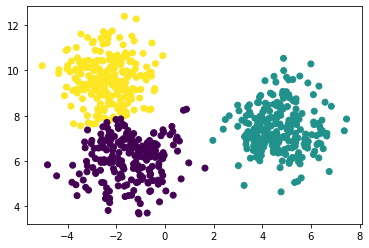

In [27]:
plt.scatter(X_train[:,0], X_train[:,1], c= y_labels)

In [29]:
y_test_label = kmeans.predict(X_test)

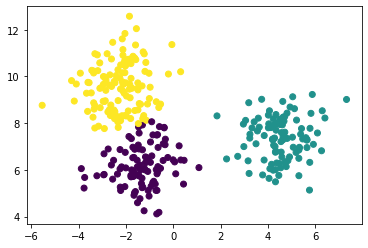

In [30]:
plt.scatter(X_test[:,0], X_test[:,1], c= y_test_label)

Automate the K value

In [31]:
!pip install kneed

In [32]:
from kneed import KneeLocator

In [35]:
kl = KneeLocator(range(1,11), wcss, curve = 'convex', direction='decreasing')

In [36]:
kl.elbow

3

Performance Metrics 

In [38]:
from sklearn.metrics import silhouette_score

In [42]:
silhouette_coefficents = []
import warnings

for k in range(2,11):
    kmeans = KMeans(n_clusters=k, init='k-means++') 
    kmeans.fit(X_train)
    score = silhouette_score(X_train, kmeans.labels_)
    silhouette_coefficents.append(score)
    

C:\Users\97798\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\97798\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\97798\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\97798\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [43]:
silhouette_coefficents

[0.6414321128693712,
 0.5967090037670926,
 0.5042754863155509,
 0.390035206157075,
 0.3272620487544119,
 0.3537728044876017,
 0.36012474434442776,
 0.3610115248545814,
 0.34632592271340806]

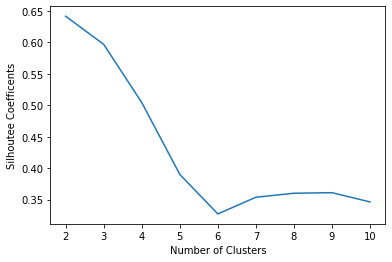

In [45]:
plt.plot(range(2,11), silhouette_coefficents)
plt.xticks(range(2,11))
plt.xlabel('Number of Clusters')
plt.ylabel('Silhoutee Coefficents')
plt.show()